# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [86]:
# your answer here
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [89]:
temp.head(10)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [88]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In this dataframe we have three columns with:
    
    1- City: a string, gives the name of the studied city (6 different City: NYC, Albany, Buffalo, Hartford, Bridgeport, Treton, Newark
    2- State: a string, gives the name of the state to which each city belongs (3 different States: New York, Connecticut, New Jersey)
    3- Temperature: a float

#### Select the rows where state is New York

In [13]:
# your answer here
ny = temp[temp["State"] == 'New York']

In [14]:
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [16]:
# your answer here
ny['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [21]:
# your answer here
above_15 = temp[temp["Temperature"] > 15]
above_15.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [25]:
# your answer here
cities = temp[['City', 'Temperature']]
above_15_city = cities[cities["Temperature"] > 15]
above_15_city

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [30]:
# your answer here
ab_15_20 = cities[(cities['Temperature'] > 15) & (cities['Temperature'] < 20)]
ab_15_20

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

Two different ways to do it

In [120]:
res = temp.groupby("State")["Temperature"].agg(['mean', 'std']).reset_index()
res

,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


In [121]:
def mean_std(state):
    temp_state = []
    for index, row in temp.iterrows():
        if row["State"] == state:
            temp_state.append(row ["Temperature"])
    mean = np.round(np.mean(temp_state),3)
    std = np.round(np.std(temp_state), 3)
    return (f"In {state} the mean temperature was {mean} +/- {std}")

In [122]:
mean_std('Connecticut')

'In Connecticut the mean temperature was 15.833 +/- 1.389'

In [123]:
mean_std('New Jersey')

'In New Jersey the mean temperature was 21.111 +/- 1.111'

In [124]:
mean_std('New York')

'In New York the mean temperature was 10.741 +/- 6.641'

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [142]:
# your answer here
employee = pd.read_csv("employee.csv")
employee.head(5)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [61]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In this dataset we have 6 columns:

    1- Departement: a string, gives the 3 different departaments in the company (IT, HR, Sales)
    2- Education : a string, indicates the level of education of the company's employees
    3- Gender: a string, indicates the gender of each employee
    4- Title: a string, gives us information about the role of the employee.
    5- Years: a interger, the number of years each employee has been working for the company
    6- Salary: a integer, the salary of each of the employees

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

(array([1., 3., 1., 0., 1., 0., 0., 0., 1., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

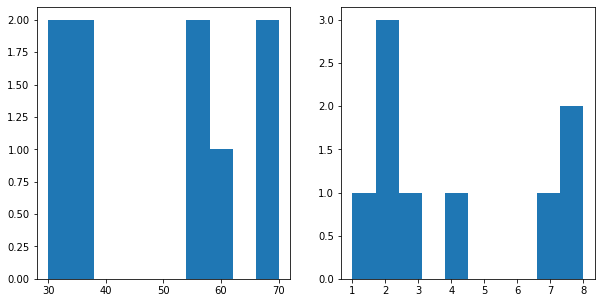

In [129]:
# your answer here
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
axes[0].hist(employee['Salary'])
axes[1].hist(employee['Years'])


In relation to **salary**, the sample histogram suggests clear groups, those that earn between 30-40, those that do between 55-60 and those that do between 65-70

On the other hand, regarding the **years** worked by the employees, we can again see three groups. Those who have been working between 1-3 years, a small group of 4 years and finally a group of people who have been between 7-8 years. The group where we find the most employees is the first, with a clear peak in people who have been hired for two years.

#### What's the average salary in this company?

In [132]:
# your answer here
mean = employee.Salary.mean()
mean

48.888888888888886

#### What's the highest salary?

In [133]:
# your answer here
high = employee.Salary.max()
high

70

#### What's the lowest salary?

In [134]:
# your answer here
low = employee.Salary.min()
low

30

#### Who are the employees with the lowest salary?

In [143]:
# your answer here
employee[(employee['Salary'] == 30)]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [145]:
employee.loc[employee['Salary'] == 30, 'Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [81]:
# your answer here
employee[(employee['Name'] == 'David')]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [83]:
# your answer here
david = employee[(employee['Name'] == 'David')]
david["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [86]:
# your answer here
employee[(employee["Title"] == 'associate' )]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [87]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [89]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [92]:
# your answer here
subset = employee[(employee["Title"] == 'associate') & (employee['Salary'] > 55)]
subset

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [95]:
# your answer here
year_salary = employee.groupby("Years").mean().reset_index()
year_salary

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [97]:
# your answer here
title_salary = employee.groupby("Title").mean().reset_index()
title_salary

,Title,Years,Salary
0,VP,8.00,70.000000
1,analyst,2.25,32.500000
2,associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

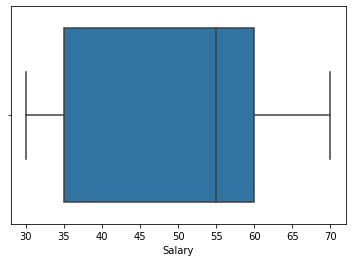

In [98]:
# draw boxplot here
sns.boxplot(x="Salary", data= employee)
plt.show()


The "mustache" on the right represents quantile 75, that is, 25% of employees have a salary of more than 60.

The boxplot line represents the median salary of the employees, that is, half of the employees earn 55.

Finally, the "mustache" on the left represents the 25th quartile, that is, 75% of employees earn more than 35.

In [147]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

This result indicates that 75% of people have a salary higher than 35

In [100]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

This result indicates that 25% of people have a salary higher than 60

#### Is the mean salary per gender different?

In [101]:
# your answer here
gender_salary = employee.groupby("Gender").mean().reset_index()
gender_salary

,Gender,Years,Salary
0,F,4.0,47.5
1,M,4.2,50.0


Yes, in the case of this dataframe the data shows that men's salary is $2.5 more than women.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [151]:
# your answer here
mean_department = employee.groupby("Department").mean()
max_department = employee.groupby("Department").max()
min_department = employee.groupby("Department").min()

print(mean_department)
print('-'*40)
print(max_department)
print('-'*40)
print(min_department)
print('-'*40)

               Years  Salary
Department                  
HR          4.666667   45.00
IT          4.500000   48.75
Sales       2.500000   55.00
----------------------------------------
              Name Education Gender      Title  Years  Salary
Department                                                   
HR           Sonia    Master      M    analyst      8      70
IT           Pedro       Phd      M  associate      8      70
Sales       Samuel    Master      M  associate      3      55
----------------------------------------
              Name Education Gender      Title  Years  Salary
Department                                                   
HR             Ana  Bachelor      F         VP      2      30
IT          Carlos  Bachelor      F         VP      1      30
Sales          Eva  Bachelor      F  associate      2      55
----------------------------------------


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [119]:
# your answer here
minimal = employee.groupby('Department')['Salary'].min()
maximal = employee.groupby('Department')['Salary'].max()

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64

In [121]:
minimal

Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64

In [120]:
maximal

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64

In [123]:
### Difference between max and min:

employee.groupby("Department")["Salary"].apply(lambda g: g.max() - g.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [2]:
# your answer here
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [3]:
# your answer here
orders[["amount_spent", "UnitPrice"]].describe()

,amount_spent,UnitPrice
count,397924.000000,397924.000000
mean,22.394749,3.116174
std,309.055588,22.096788
min,0.000000,0.000000
25%,4.680000,1.250000
50%,11.800000,1.950000
75%,19.800000,3.750000
max,168469.600000,8142.750000


For **amount spent**, the results show that the mean is 22.39 but with a large standard deviation (309.05). It also has a mode of 11.80 (50% percentile). The values vary between 0 and 168469, which explains the large standard deviation. On the other hand, the results obtained from the function describes for this column indicate that 75 of the people spend more than 4.68 while 25% of the people spend more than 19.80.

------------------------------------------------------------------------------

On the other hand, for the **unit price**, the mean is 3.11 with a lower mode of 1.95 and a standard deviation of 22.09. As before, the minimum is 0, while the maximum is 8142.75. Finally, 75% of the products have a unit price of more than 1.25 and 25% have a unit price of more than 3.75.


####  What is the average Purchase Price?

Here I have some doubts, but I think it refers to the unit price

In [79]:
# your answer here
orders.UnitPrice.mean()

3.1161744805540756

In [4]:
invoice_amounts = orders.groupby("InvoiceNo").amount_spent.sum().mean()

In [5]:
invoice_amounts.mean()

480.7621873111783

#### What were the highest and lowest purchase prices? 

In [80]:
# your answer here
orders.UnitPrice.max()

8142.75

In [6]:
invoice_amounts.max()

480.7621873111783

In [81]:
# your answer here
orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [11]:
sp = orders[orders["Country"] == "Spain"]
sp.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


In [9]:
# your answer here
spain = orders[orders["Country"] == "Spain"].CustomerID.unique()
spain

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [9]:
# your answer here
##There are as many customers as the number of different customers we have in our database. 
    #So, the first thing I do is to get the number of uniques and then add them all up. 

unique = sp["CustomerID"].unique()
number_customers = len(unique)
number_customers

30

In [11]:
num = len(sp.value_counts("CustomerID"))
num

30

#### Select all the customers who have bought more than 50 items ?

In [12]:
# your answer here
# With this I create a new column with the result of the groupby
orders['cust_quant'] = orders.groupby(['CustomerID'])['Quantity'].transform('count')
orders

#Ahora busco los que han comprado mas de 50 items:

above_50 = orders[orders["cust_quant"] > 50]
above_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,297
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,297
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297


#### Select orders from Spain that are above 50 items

In [13]:
# your answer here
above_Spain =  above_50[above_50["Country"] == "Spain"]
above_Spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
13974,21565,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,17097,Spain,29.95,211
13975,21566,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,17097,Spain,2.10,211
13976,21567,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,17097,Spain,1.25,211
13977,21568,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,17097,Spain,2.55,211
13978,21569,538095,21114,2010,12,4,14,lavender scented fabric heart,5,2010-12-09 14:55:00,1.25,17097,Spain,6.25,211


#### Select all free orders

In [84]:
# your answer here
free = orders[orders['amount_spent'] == 0]
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant,aug_count
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,122,9042
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,57,354345
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,5677,7238
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1028,354345
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1028,354345


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [25]:
# your answer here
lunch_box = orders[orders['Description'].str.contains("lunch bag")]
lunch_box.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50,327
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50,30
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,147
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,147
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30,147


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [24]:
# your answer here
lunch_box_2011 = lunch_box[lunch_box["year"] == 2011]
lunch_box_2011.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,476
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,476
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30,1502
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65,1502
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65,662


#### Show the frequency distribution of the amount spent in Spain.

(0.0, 2500.0)

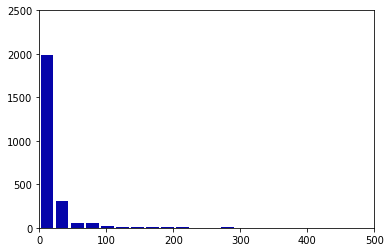

In [56]:
# your answer here
## I reuse the dataframe that I generated in exercise 4.0.0.5 that was called Spain and that contained all the orders that have been made in Spain
plt.hist(x=sp.amount_spent, bins=60, color='#0504aa', rwidth=0.85)

plt.xlim(0, 500)
plt.ylim(0, 2500)

#### Select all orders made in the month of August

In [58]:
# your answer here

aug = orders[orders["month"] == 8]
aug.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20,2
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36,2
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40,14
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40,14
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20,14


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [66]:
# your answer here
country_aug = orders.groupby('Country')['amount_spent'].agg(['count']).reset_index()
country_aug.head(5)

,Country,count
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


#### What's the  average amount of money spent by country

In [69]:
# your answer here
country_mean = orders.groupby("Country")["amount_spent"].agg(['mean']).reset_index()
country_mean.head()

,Country,mean
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500


#### What's the most expensive item?

In [74]:
# your answer here
expensive = orders["UnitPrice"].max()
expensive

8142.75

#### What was the average amount spent per year ?

In [76]:
# your answer here
year_mean = orders.groupby("year")["amount_spent"].agg(['mean']).reset_index()
year_mean.head()

,year,mean
0,2010,21.892733
1,2011,22.430074
